Original opensees documentation link: https://opensees.berkeley.edu/wiki/index.php/Moment_Curvature_Example

moment-curvature analysis of a rectangular reinforced concrete section. In this example a Zero Length element with the fiber discretization of the cross section is used. 
<img src="https://opensees.berkeley.edu/wiki/images/5/5f/MomentCurvature.png"></img>


In [1]:
import openseespy.opensees as ops
import opsvis as ovs
import numpy as np
import matplotlib.pyplot as plt


## Section Definition

<img src="https://opensees.berkeley.edu/wiki/images/6/63/MomentCurvatureSection.png" align="left"></img>
<img src="https://opensees.berkeley.edu/wiki/images/0/08/MomentCurvatureSectionDiscritization.png" align="right"></img>


## section variables

In [2]:
#section parameters
d = 24 #inch
w = 15
cov = 1.5 #cover of unconfined concrete in inches
As  =  0.60    # area of no. 7 bars


concrete_coors_ext = [-d/2, w/2, -d/2, -w/2, d/2, -w/2,  d/2, w/2]

rebars_z = np.array([w/2-cov, 0., -w/2+cov])
rebars_y = np.array([d/2-cov, 0., -d/2+cov])

rebars_coors = []
for i,z in enumerate(rebars_z):
    for j,y in enumerate(rebars_y):
        if (z,y)!=(0,0):
            rebars_coors.append((z,y))


## Material properties

In [3]:
#material properties
#concrete
    #core concrete confined
core_conc = 1 #tag
fc_c = -6.0
ec0_c = -0.004
fcu_c = -5.0
ecu_c = -0.014

    #cover concrete unconfined
cover_conc = 2 #tag
fc_u = -5.0
ec0_u = -0.002
fcu_u = -0.0
ecu_u = -0.006

# STEEL
# Reinforcing steel 
steel = 3 #tag
fy =  60.0   # Yield stress
E =  30000.0  # Young's modulus
b = 0.01

In [22]:
def getSection(plotFiberSection = True):
    ops.wipe()
    ops.model("BasicBuilder", '-ndm', 2, '-ndf', 3)
                                        #tag   f'c        ec0   f'cu   ecu
    ops.uniaxialMaterial('Concrete01', core_conc, fc_c, ec0_c, fcu_c, ecu_c)
    ops.uniaxialMaterial('Concrete01', cover_conc, fc_u, ec0_u, fcu_u, ecu_u)
    ops.uniaxialMaterial('Steel01', steel, fy, E, b)

    ops.section('Fiber', 1)
    # Create the concrete core fibers
    #patch('rect', matTag, numSubdivY, numSubdivZ, *crdsI, *crdsJ)
    numSubdivY = 10
    numSubdivZ = 1
    ops.patch('rect', core_conc, numSubdivY, numSubdivZ, *[-d/2+cov, w/2-cov, d/2-cov, -w/2+cov])

    #cover concrete
    #+y, +y, +z, -z
    ops.patch('rect', cover_conc, 2, 1,*[d/2, w/2-cov, d/2-cov, -w/2+cov])
    ops.patch('rect', cover_conc, 2, 1, *[-d/2, w/2-cov, -d/2+cov, -w/2+cov])
    ops.patch('rect', cover_conc, 10, 1, *[-d/2, -w/2+cov, d/2 , -w/2])
    ops.patch('rect', cover_conc, 10, 1, *[ -d/2, w/2-cov, d/2, w/2])

    #layer('straight', matTag, numFiber, areaFiber, *start, *end)
    #top bottom mid
    ops.layer('straight', steel, 3, As, *[d/2-cov, w/2-cov], *[ d/2-cov, -w/2+cov])
    ops.layer('straight', steel, 3, As, *[-d/2+cov, w/2-cov,], *[-d/2+cov, -w/2+cov])
    ops.layer('straight', steel, 2, As, *[0, w/2-cov], *[0, -w/2+cov])    

    if plotFiberSection:
        fib_sec_list = [['section', 'Fiber', 1],
                        ['patch', 'rect', core_conc, numSubdivY, numSubdivZ, *[-d/2+cov, w/2-cov, d/2-cov, -w/2+cov]],
                        ['patch', 'rect', cover_conc, 2, 1, *[d/2, w/2-cov, d/2-cov, -w/2+cov]],
                        ['patch', 'rect', cover_conc, 2, 1, *[-d/2, w/2-cov, -d/2+cov, -w/2+cov]],
                        ['patch', 'rect', cover_conc, 10, 1, *[-d/2, -w/2+cov, d/2 , -w/2]],
                        ['patch', 'rect', cover_conc, 10, 1, *[ -d/2, w/2-cov, d/2, w/2]],
                            ['layer', 'straight', steel, 3, As, *[d/2-cov, w/2-cov], *[ d/2-cov, -w/2+cov]],
                            ['layer', 'straight', steel, 3, As, *[-d/2+cov, w/2-cov,], *[-d/2+cov, -w/2+cov]],
                            ['layer', 'straight', steel, 2, As, *[0, w/2-cov], *[0, -w/2+cov]],
                       ]
        matcolor = ['lightgrey', 'lightgrey', 'gold', 'w', 'w', 'w']
        ovs.plot_fiber_section(fib_sec_list, matcolor=matcolor)
        plt.axis('equal')

In [23]:
print(*np.array(concrete_coors[:4]))

-12.0 7.5 -12.0 -7.5



Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line

Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line

Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line


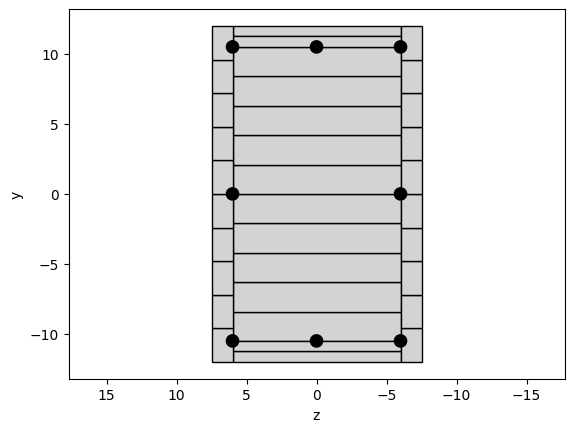

In [24]:
getSection(plotFiberSection = True)